In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import tensorflow as tf
import pickle

2024-06-03 08:52:00.825592: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
masks = C.Helper.load_seg_data(CAPATH)

In [6]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [7]:
with open('unet_28/train_patient_order.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('unet_28/test_patient_order.pkl', 'wb') as f:
    pickle.dump(X_test, f)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

11029


In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13485, 512, 512, 1) (13485, 512, 512, 1) (3281, 512, 512, 1) (3281, 512, 512, 1)


In [11]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13485, 512, 512, 1) (3281, 512, 512, 1)


In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [13]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13485, 512, 512, 1) (3281, 512, 512, 1)


In [14]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2024-06-03 08:55:25.961822: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-06-03 08:55:26.131671: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-06-03 08:55:26.134327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2024-06-03 08:55:26.134350: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-06-03 08:55:26.188109: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-03 

In [16]:
model.save('unet_28/unet_model.h5')

In [17]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-06-03 08:55:30.054623: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-06-03 08:55:30.057806: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-06-03 08:55:31.712086: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-06-03 08:55:33.044951: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-06-03 08:55:34.599748: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-06-03 08:55:34.599774: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-06-03 08:55:34.600616: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-06-03 08:55:34.691618: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-06-03 08:55:36.112322: I tensorflow/stream_exec

689/689 [==============================] - 324s 449ms/step - loss: 0.0858 - iou: 4.5895e-05 - iou_thresholded: 0.3334 - val_loss: 0.0027 - val_iou: 1.1140e-04 - val_iou_thresholded: 0.8385
Epoch 2/200
689/689 [==============================] - 311s 445ms/step - loss: 0.0015 - iou: 3.9678e-04 - iou_thresholded: 0.4221 - val_loss: 7.5404e-04 - val_iou: 4.7268e-04 - val_iou_thresholded: 0.7795
Epoch 3/200
689/689 [==============================] - 306s 444ms/step - loss: 4.8196e-04 - iou: 0.0012 - iou_thresholded: 0.4250 - val_loss: 0.0014 - val_iou: 0.0040 - val_iou_thresholded: 0.5766
Epoch 4/200
689/689 [==============================] - 306s 444ms/step - loss: 2.4420e-04 - iou: 0.0030 - iou_thresholded: 0.3989 - val_loss: 2.4947e-04 - val_iou: 0.0041 - val_iou_thresholded: 0.7224
Epoch 5/200
689/689 [==============================] - 306s 444ms/step - loss: 1.5314e-04 - iou: 0.0054 - iou_thresholded: 0.4341 - val_loss: 1.5993e-04 - val_iou: 0.0040 - val_iou_thresholded: 0.7466
Epoch 6

Epoch 42/200
689/689 [==============================] - 306s 444ms/step - loss: 9.7787e-06 - iou: 0.4046 - iou_thresholded: 0.7268 - val_loss: 5.8705e-05 - val_iou: 0.5043 - val_iou_thresholded: 0.7602
Epoch 43/200
689/689 [==============================] - 306s 444ms/step - loss: 8.5856e-06 - iou: 0.4512 - iou_thresholded: 0.7700 - val_loss: 6.2731e-05 - val_iou: 0.5305 - val_iou_thresholded: 0.8648
Epoch 44/200
689/689 [==============================] - 306s 444ms/step - loss: 9.3422e-06 - iou: 0.4299 - iou_thresholded: 0.7383 - val_loss: 5.3985e-05 - val_iou: 0.5011 - val_iou_thresholded: 0.8306
Epoch 45/200
689/689 [==============================] - 306s 444ms/step - loss: 8.8790e-06 - iou: 0.4384 - iou_thresholded: 0.7620 - val_loss: 5.7534e-05 - val_iou: 0.5405 - val_iou_thresholded: 0.8553
Epoch 46/200
689/689 [==============================] - 306s 444ms/step - loss: 8.8109e-06 - iou: 0.4648 - iou_thresholded: 0.7684 - val_loss: 5.6808e-05 - val_iou: 0.5086 - val_iou_thresholde

689/689 [==============================] - 306s 444ms/step - loss: 4.9058e-06 - iou: 0.6576 - iou_thresholded: 0.8736 - val_loss: 8.5484e-05 - val_iou: 0.5880 - val_iou_thresholded: 0.8328
Epoch 83/200
689/689 [==============================] - 306s 444ms/step - loss: 4.4137e-06 - iou: 0.6722 - iou_thresholded: 0.8689 - val_loss: 7.1735e-05 - val_iou: 0.6211 - val_iou_thresholded: 0.8327
Epoch 84/200
689/689 [==============================] - 306s 444ms/step - loss: 4.8315e-06 - iou: 0.6740 - iou_thresholded: 0.8718 - val_loss: 9.1379e-05 - val_iou: 0.5751 - val_iou_thresholded: 0.8378
Epoch 85/200
689/689 [==============================] - 306s 444ms/step - loss: 5.4289e-06 - iou: 0.6262 - iou_thresholded: 0.8634 - val_loss: 7.4185e-05 - val_iou: 0.5774 - val_iou_thresholded: 0.8237
Epoch 86/200
689/689 [==============================] - 306s 444ms/step - loss: 4.1788e-06 - iou: 0.6936 - iou_thresholded: 0.8826 - val_loss: 8.8271e-05 - val_iou: 0.6377 - val_iou_thresholded: 0.8423
Epo

689/689 [==============================] - 306s 444ms/step - loss: 3.0750e-06 - iou: 0.7572 - iou_thresholded: 0.9272 - val_loss: 1.0678e-04 - val_iou: 0.6581 - val_iou_thresholded: 0.8103
Epoch 123/200
689/689 [==============================] - 306s 444ms/step - loss: 3.5491e-06 - iou: 0.7560 - iou_thresholded: 0.9376 - val_loss: 9.5015e-05 - val_iou: 0.6409 - val_iou_thresholded: 0.8200
Epoch 124/200
689/689 [==============================] - 306s 444ms/step - loss: 2.9613e-06 - iou: 0.7897 - iou_thresholded: 0.9353 - val_loss: 1.1693e-04 - val_iou: 0.5981 - val_iou_thresholded: 0.8179
Epoch 125/200
689/689 [==============================] - 306s 444ms/step - loss: 3.0347e-06 - iou: 0.7697 - iou_thresholded: 0.9307 - val_loss: 1.0785e-04 - val_iou: 0.5827 - val_iou_thresholded: 0.8584
Epoch 126/200
689/689 [==============================] - 306s 444ms/step - loss: 2.7034e-06 - iou: 0.7750 - iou_thresholded: 0.9352 - val_loss: 9.7720e-05 - val_iou: 0.7108 - val_iou_thresholded: 0.8472

689/689 [==============================] - 306s 444ms/step - loss: 2.0650e-06 - iou: 0.8322 - iou_thresholded: 0.9717 - val_loss: 1.4725e-04 - val_iou: 0.6273 - val_iou_thresholded: 0.8364
Epoch 163/200
689/689 [==============================] - 306s 444ms/step - loss: 1.9391e-06 - iou: 0.8263 - iou_thresholded: 0.9755 - val_loss: 1.5539e-04 - val_iou: 0.6863 - val_iou_thresholded: 0.8355
Epoch 164/200
689/689 [==============================] - 306s 444ms/step - loss: 1.4086e-06 - iou: 0.8809 - iou_thresholded: 0.9782 - val_loss: 1.5830e-04 - val_iou: 0.6741 - val_iou_thresholded: 0.8196
Epoch 165/200
689/689 [==============================] - 306s 444ms/step - loss: 2.2574e-06 - iou: 0.8329 - iou_thresholded: 0.9683 - val_loss: 1.5458e-04 - val_iou: 0.5596 - val_iou_thresholded: 0.8224
Epoch 166/200
689/689 [==============================] - 306s 444ms/step - loss: 2.2245e-06 - iou: 0.8114 - iou_thresholded: 0.9657 - val_loss: 1.5472e-04 - val_iou: 0.5436 - val_iou_thresholded: 0.8390

In [18]:
with open('unet_28/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

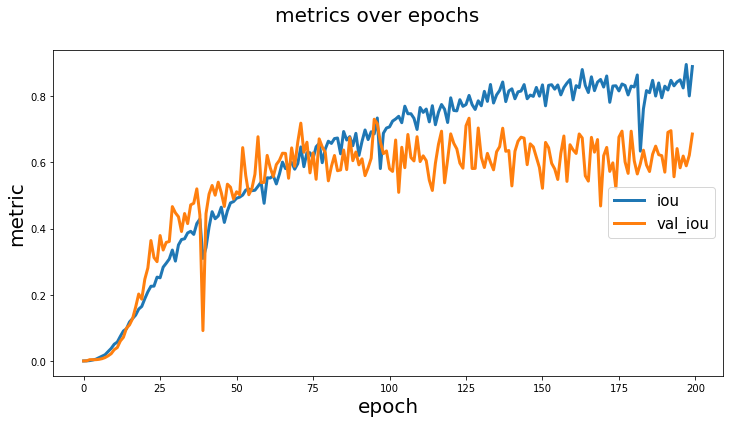

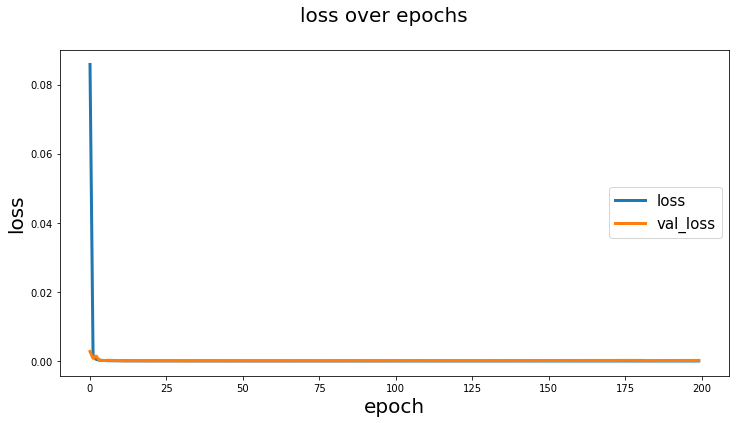

In [19]:
C.Helper.visualize_graph(history)

In [20]:
y_pred = C.Helper.prediction(test_images_array, model)

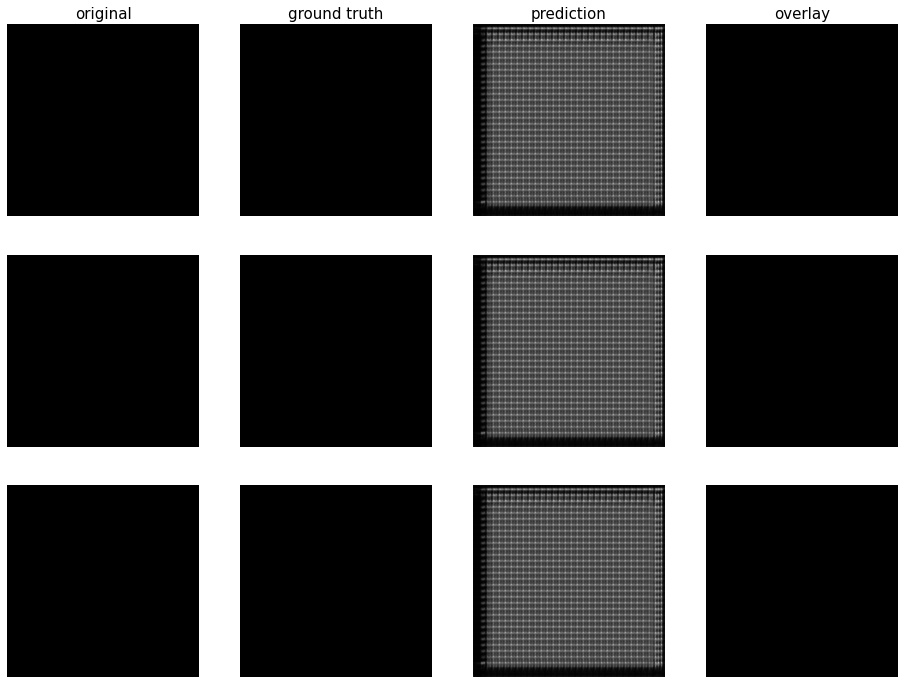

In [21]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

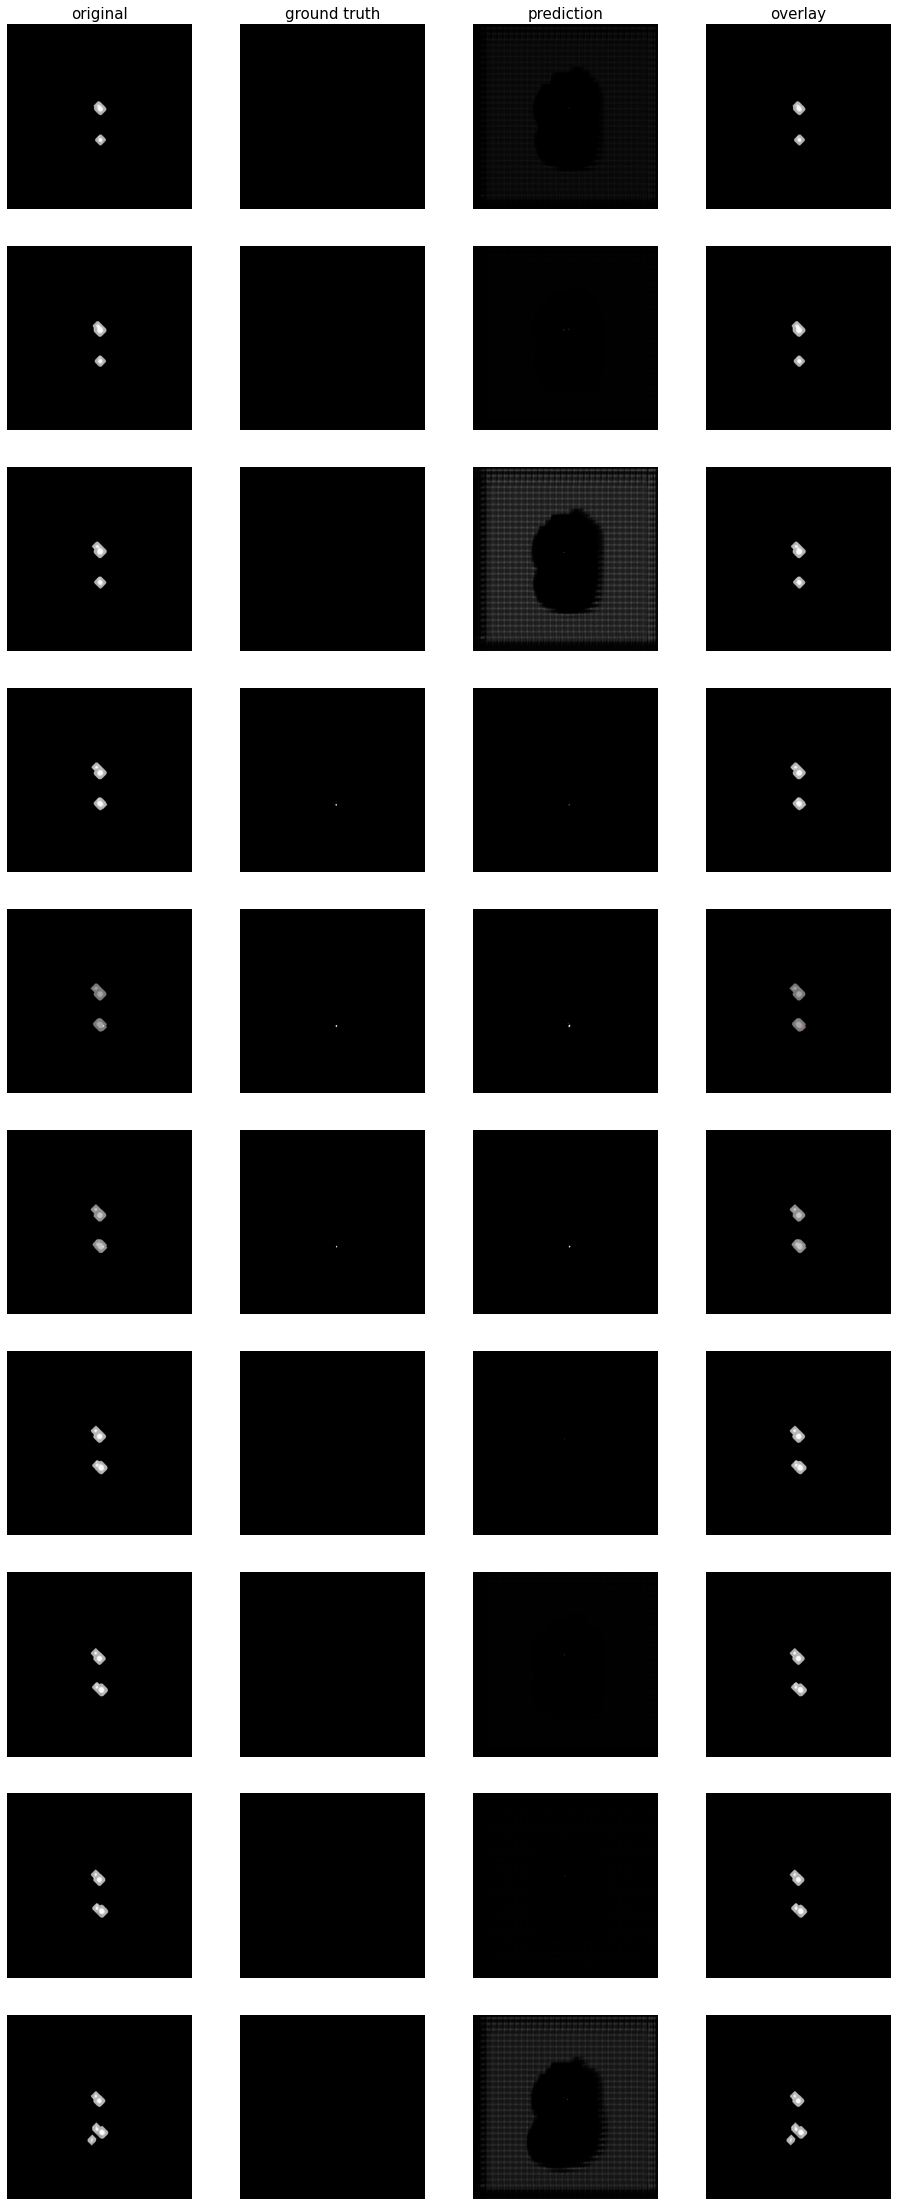

In [37]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=85, end_index=95)

In [23]:
C.Helper.evaluate(test_images_array, y_test, model)

103/103 [==============================] - 27s 258ms/step - loss: 1.1667e-04 - iou: 0.5693 - iou_thresholded: 0.8282


In [24]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

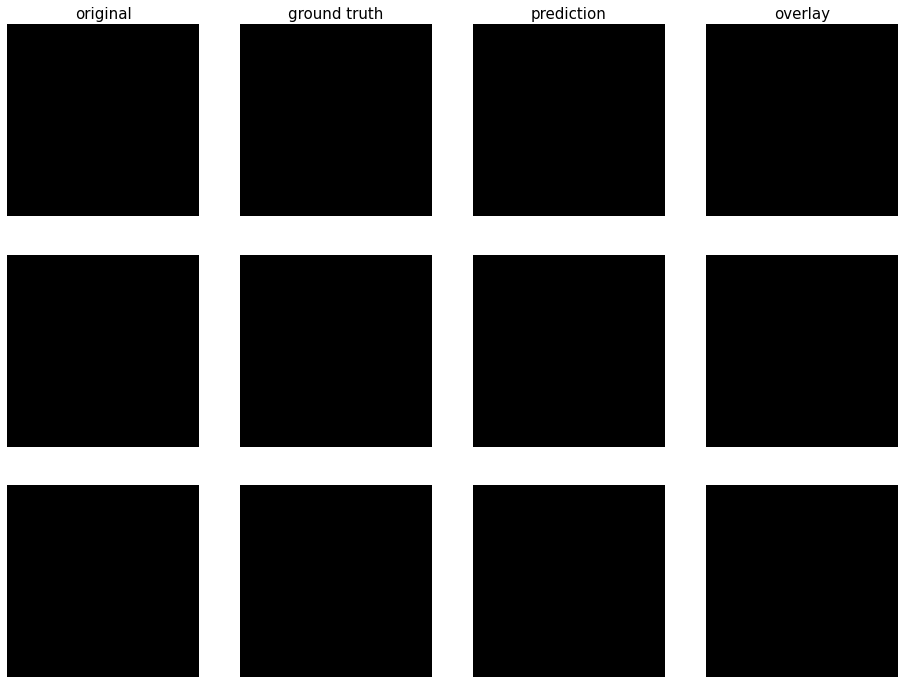

In [25]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

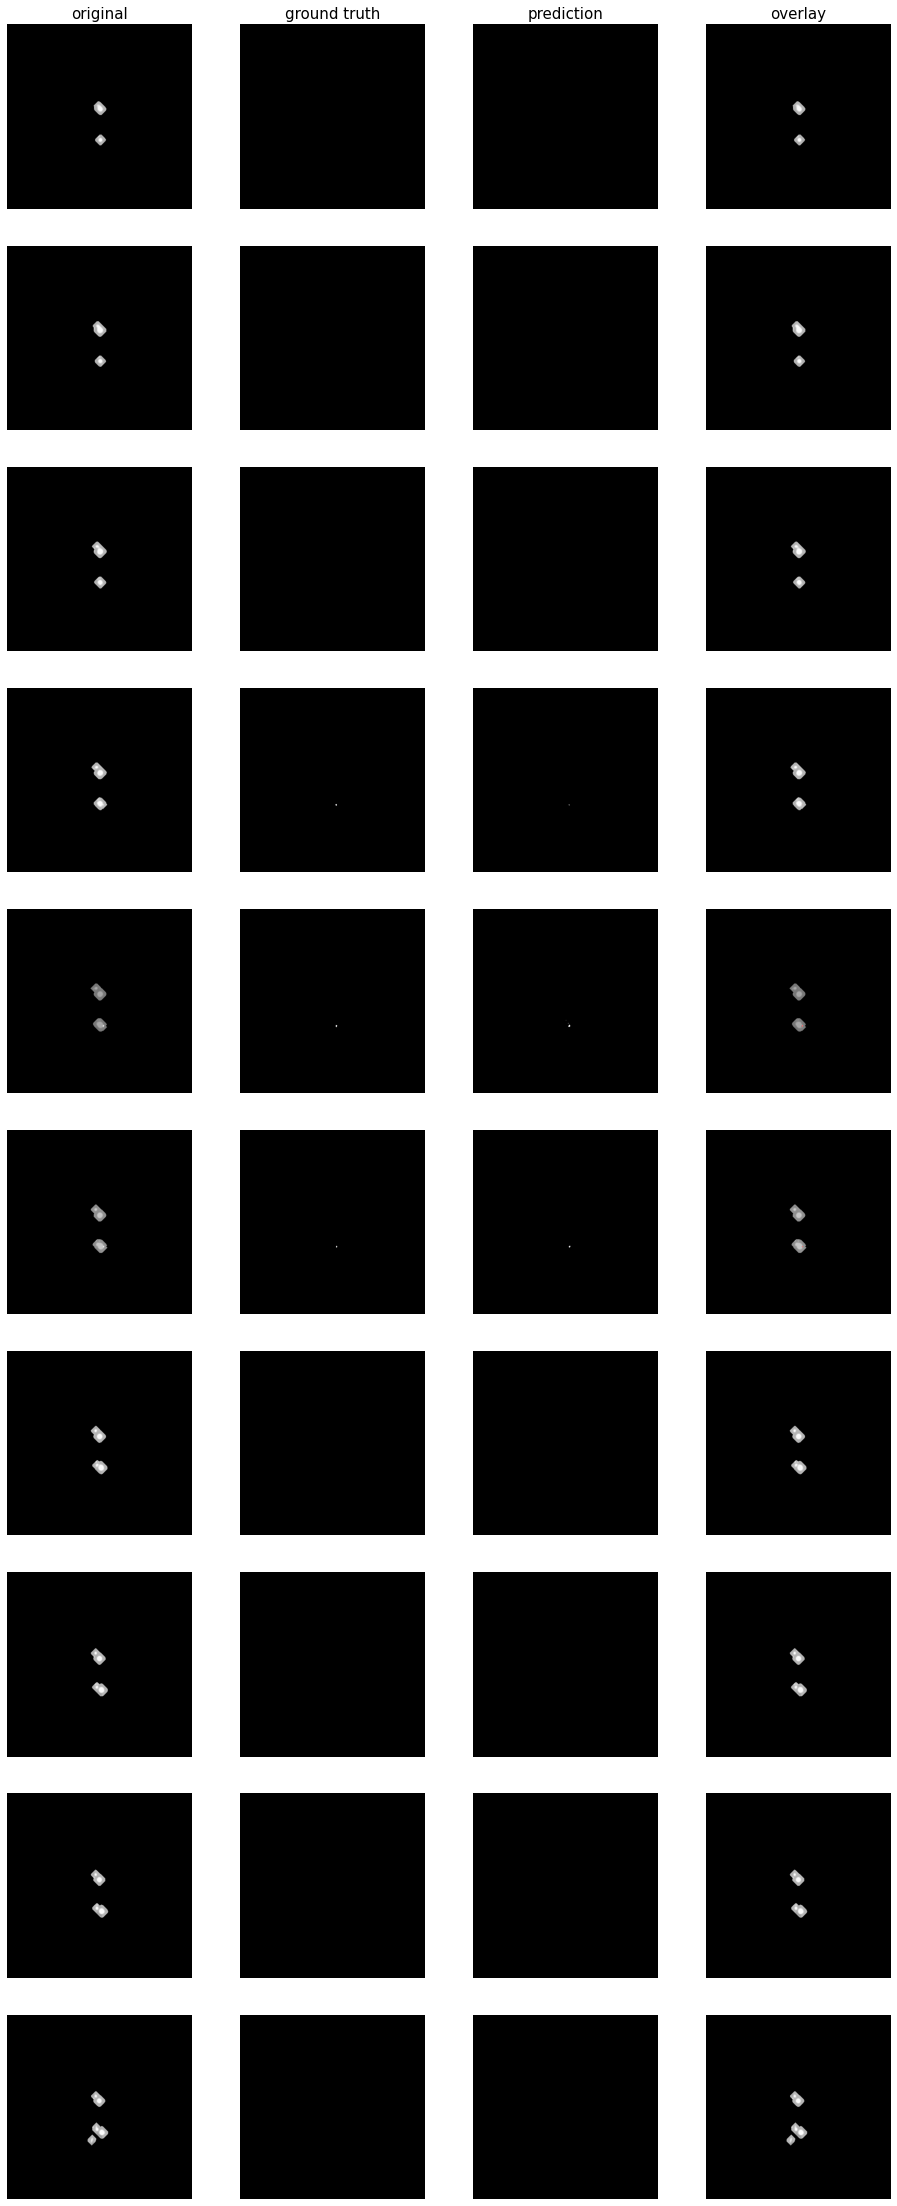

In [38]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=85, end_index=95)

In [27]:
C.Helper.evaluate(test_images_array, a_binary, model)

103/103 [==============================] - 27s 259ms/step - loss: 3.6196e-07 - iou: 0.7092 - iou_thresholded: 1.0000


In [28]:
experiment_data = {
    'slice_to_patient_mapping': slice_to_patient_mapping,
    'last_key': last_key,
    'predictions': y_pred,
    'y_pred_threshold': a_binary
}

In [53]:
experiment_data_path = 'unet_28/experiment_data.pkl'

In [54]:
with open(experiment_data_path, 'wb') as f:
    pickle.dump(experiment_data, f)

OSError: [Errno 122] Disk quota exceeded